In [5]:
# Estudo sobre empresas impedidas de participar de licitações públicas por estarem em situação considerada irregular
# http://transparencia.gov.br/sancoes/cepim?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&colunasSelecionadas=cnpj%2Cnome%2CufSancionado%2Cmotivo%2Corgao%2Cconvenio
# Pesquisa referente ao dia 31/05/2019
import pandas as pd
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [6]:
filename = 'empresas_impedidas.csv'
df = pd.read_csv(filename, engine='python', sep=';')

In [7]:
df.sample(10)

,CNPJ,Nome,UF do sancionado,Motivo do impedimento,Órgão,Nº do Convênio
56,06.155.302/0001-15,ASSOCIACAO CAMOCINENSE DE LIVRE ORIENTACAO SEXUAL,CE,IRREGULARIDADE NA EXECUCAO FINANCEIRA,"Ministério da Mulher, Família e Direitos Human...",601656
2056,09.185.398/0001-52,FUNDACAO DE APOIO A PESQUISA E A EXTENSAO,PB,MOTIVO NÃO ESPECIFICADO,Ministério da Educação - Unidades com vínculo ...,436486
1176,37.113.842/0001-60,GRUPO DE TRABALHO AMAZONICO GTA,DF,NAO APRESENTACAO DA PRESTACAO DE CONTAS,Ministério da Cidadania - Unidades com vínculo...,524402
410,03.329.800/0001-49,FUNDACAO EDUCACIONAL CULTURAL E TECNOLOGICA DE...,CE,NAO APRESENTACAO DE DOCUMENTACAO COMPLEMENTAR,Ministério da Educação - Unidades com vínculo ...,380765
3760,04.977.238/0001-22,CENTRO DE REFERENCIA A DISCRIMINACAO RELIGIOSA...,RJ,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,"Ministério da Ciência, Tecnologia, Inovações e...",573213
1050,01.549.568/0001-29,FEDERACAO BRASILIENSE DE KUNG-FU-FEBRAK,DF,IRREGULARIDADE NA EXECUCAO FISICA DO OBJETO,Ministério da Cidadania - Unidades com vínculo...,523737
376,02.257.655/0001-75,FUNDACAO DE ADMINISTRACAO E PESQUISA ECONOMICO...,BA,MOTIVO NÃO ESPECIFICADO,"Ministério da Ciência, Tecnologia, Inovações e...",423700
2051,09.185.398/0001-52,FUNDACAO DE APOIO A PESQUISA E A EXTENSAO,PB,NAO APRESENTACAO DE DOCUMENTACAO COMPLEMENTAR,Ministério da Educação - Unidades com vínculo ...,371171
4157,07.645.873/0001-09,NUCLEO CULTURAL DIREITO AO SABER,SP,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,Ministério da Educação - Unidades com vínculo ...,579419
2793,04.410.260/0001-96,CENTRO SOCIAL BENEFICENTE DA ALIANCA,PE,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,Ministério da Saúde - Unidades com vínculo direto,547474


In [8]:
df.rename(columns={'UF do sancionado': 'UFDOSANCIONADO',
                   'Motivo do impedimento': 'MOTIVODOIMPEDIMENTO',
                   'Nº do Convênio': 'NUMERODOCONVÊNIO',
                   'Nome': 'NOME',
                   'Órgão': 'ÓRGÃO'
                  }, inplace=True)

In [7]:
df.sample(10)

,CNPJ,NOME,UFDOSANCIONADO,MOTIVODOIMPEDIMENTO,ÓRGÃO,NUMERODOCONVÊNIO
3606,02.246.493/0001-70,ASSOCIACAO LIMEIRENSE DE JOIAS,SP,MOTIVO NÃO ESPECIFICADO,"Ministério da Mulher, Família e Direitos Human...",735333
1027,03.487.391/0001-09,FEDERACAO BRASILEIRA DE CONVENTION & VISITORS ...,DF,MOTIVO NÃO ESPECIFICADO,Ministério do Turismo - Unidades com vínculo d...,700119
3251,00.375.555/0001-18,INSTITUTO MORRO DA CUTIA DE AGROECOLOGIA (IMCA),RN,NAO APRESENTACAO DE DOCUMENTACAO COMPLEMENTAR,"Ministério da Agricultura, Pecuária e Abasteci...",774889
23,07.138.522/0001-01,ASSOC DE PROTECAO A SAUDE MATERNIDADE A INF DE...,CE,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,Ministério da Saúde - Unidades com vínculo direto,748255
1140,03.151.583/0001-40,FUNDACAO DE GESTAO E INOVACAO,DF,TEVE A PRESTACAO DE CONTAS IMPUGNADA,"Ministério da Mulher, Família e Direitos Human...",503666
4531,03.794.783/0001-10,CENTRAL DOS ASSENTADOS DE RORAIMA,RR,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,"Ministério da Agricultura, Pecuária e Abasteci...",483501
3263,07.337.536/0001-46,INSTITUTO TERREIROS DO FUTURO EDUCACAO E IDENT...,RN,IRREGULARIDADE NA EXECUCAO FIS. E FINANCEIRA,Ministério do Turismo - Unidades com vínculo d...,700673
4653,05.610.862/0001-50,INSTITUTO BRASIL ASIA,TO,ATRASO NA ENTREGA DA PRESTACAO DE CONTAS,"Ministério da Agricultura, Pecuária e Abasteci...",645631
1466,06.037.330/0001-38,ORGANIZACAO INTERNACIONAL DA JUSTICA DE PAZ,DF,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,Ministério da Educação - Unidades com vínculo ...,534316
2130,01.627.117/0001-62,FUNDACAO RUBENS DUTRA SEGUNDO,PB,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,Ministério da Saúde - Unidades com vínculo direto,457884


In [8]:
#Empresas mais vezes impedidas em SP
df.query('UFDOSANCIONADO == "SP"')['NOME'].value_counts().head()

ASSOCIACAO NACIONAL DE COOPERACAO AGRICOLA                36
ORGANIZACAO DE SAUDE COM EXCELENCIA E CIDADANIA - OSEC    17
ASSOCIACAO DE RODEIO COMPLETO - OS TROPEIROS              12
CEPATEC - CENTRO DE FORMACAO E PESQUISA CONTESTADO         9
UNIAO NACIONAL DOS ESTUDANTES                              8
Name: NOME, dtype: int64

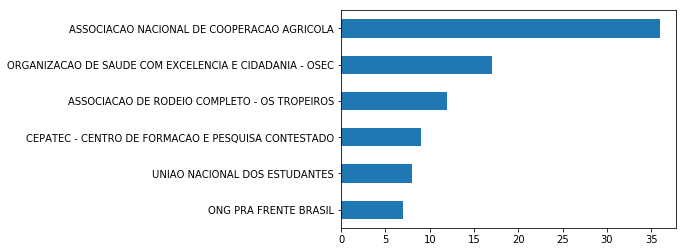

In [23]:
# Gráfico com as 6 empresas com maior ocorrência do estado de SP
df.query('UFDOSANCIONADO == "SP"')['NOME'].value_counts().sort_values().tail(6).plot(kind='barh')

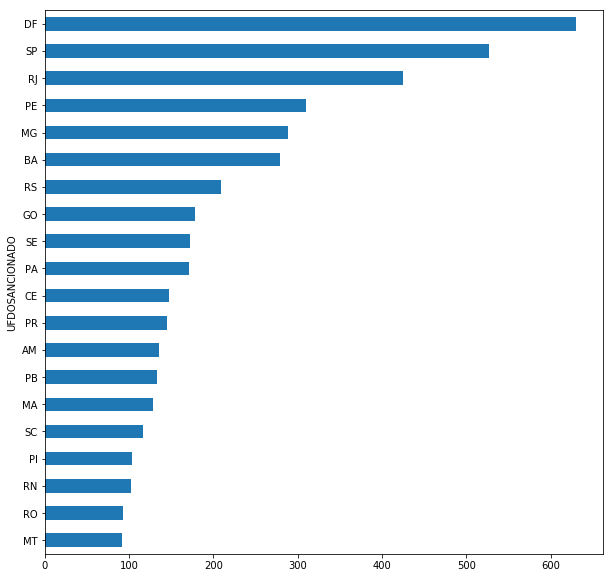

In [16]:
# Número de ocorrências por estado
df.groupby('UFDOSANCIONADO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

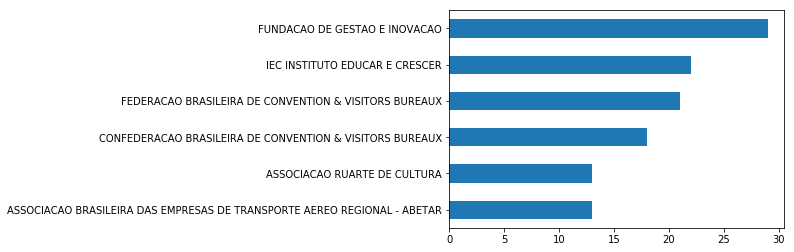

In [24]:
# Gráfico com as 6 empresas com maior ocorrência do estado de DF
df.query('UFDOSANCIONADO == "DF"')['NOME'].value_counts().sort_values().tail(6).plot(kind='barh')

In [43]:
# Os motivos de impedimento das  10 empresas com mais ocorrências no DF
df.query('UFDOSANCIONADO == "DF" and NOME == "FUNDACAO DE GESTAO E INOVACAO"')[['NOME','ÓRGÃO', 'MOTIVODOIMPEDIMENTO', 'NUMERODOCONVÊNIO']].sort_values(by="MOTIVODOIMPEDIMENTO")

,NOME,ÓRGÃO,MOTIVODOIMPEDIMENTO,NUMERODOCONVÊNIO
1130,FUNDACAO DE GESTAO E INOVACAO,Ministério da Educação - Unidades com vínculo ...,ATRASO NA ENTREGA DA PRESTACAO DE CONTAS,589753
1129,FUNDACAO DE GESTAO E INOVACAO,Ministério da Educação - Unidades com vínculo ...,ATRASO NA ENTREGA DA PRESTACAO DE CONTAS,486546
1128,FUNDACAO DE GESTAO E INOVACAO,"Ministério da Ciência, Tecnologia, Inovações e...",DESCUMPRIMENTO DE CLAUSULA/CONDICAO DO INSTR.,401361
1124,FUNDACAO DE GESTAO E INOVACAO,"Ministério da Ciência, Tecnologia, Inovações e...",DESCUMPRIMENTO DE CLAUSULA/CONDICAO DO INSTR.,511133
1125,FUNDACAO DE GESTAO E INOVACAO,"Ministério da Ciência, Tecnologia, Inovações e...",DESCUMPRIMENTO DE CLAUSULA/CONDICAO DO INSTR.,511768
1135,FUNDACAO DE GESTAO E INOVACAO,"Ministério da Agricultura, Pecuária e Abasteci...",INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,473046
1138,FUNDACAO DE GESTAO E INOVACAO,"Ministério da Agricultura, Pecuária e Abasteci...",INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,403536
1139,FUNDACAO DE GESTAO E INOVACAO,"Ministério da Agricultura, Pecuária e Abasteci...",INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,429587
1143,FUNDACAO DE GESTAO E INOVACAO,Ministério da Saúde - Unidades com vínculo direto,INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,618144
1137,FUNDACAO DE GESTAO E INOVACAO,"Ministério da Agricultura, Pecuária e Abasteci...",INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,378849


In [45]:
# Frequências dos motivos que levaram ao impedimento das empresas no DF
df.query('UFDOSANCIONADO == "DF"')['MOTIVODOIMPEDIMENTO'].value_counts().to_frame().head(20)

,MOTIVODOIMPEDIMENTO
MOTIVO NÃO ESPECIFICADO,193
INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,124
NAO APRESENTACAO DE DOCUMENTACAO COMPLEMENTAR,69
IRREGULARIDADE NA EXECUCAO FINANCEIRA,58
NAO APRESENTACAO DA PRESTACAO DE CONTAS,49
IRREGULARIDADE NA EXECUCAO FIS. E FINANCEIRA,29
IRREGULARIDADE NA EXECUCAO FISICA DO OBJETO,26
TEVE A PRESTACAO DE CONTAS IMPUGNADA,18
ATRASO NA ENTREGA DA PRESTACAO DE CONTAS,15
DESCUMPRIMENTO DE CLAUSULA/CONDICAO DO INSTR.,15


In [32]:
# Frequências dos motivos que levaram ao impedimento da empresa com mais ocorrência no DF
df.query('UFDOSANCIONADO == "DF" and NOME == "FUNDACAO DE GESTAO E INOVACAO"')['MOTIVODOIMPEDIMENTO'].value_counts().to_frame().head(20)

,MOTIVODOIMPEDIMENTO
MOTIVO NÃO ESPECIFICADO,8
INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,5
DESCUMPRIMENTO DE CLAUSULA/CONDICAO DO INSTR.,3
TEVE A PRESTACAO DE CONTAS IMPUGNADA,3
NAO APRESENTACAO DA PRESTACAO DE CONTAS,2
ATRASO NA ENTREGA DA PRESTACAO DE CONTAS,2
UTILIZOU OS RECURSOS EM DESACORDO C/PROG TRAB,1
IRREGULARIDADE NA EXECUCAO FIS. E FINANCEIRA,1
IRREGULARIDADE NA EXECUCAO FISICA DO OBJETO,1
NAO APRESENTACAO DE DOCUMENTACAO COMPLEMENTAR,1


In [9]:
# Frequências dos motivos que levaram ao impedimento das empresas no DF
df.query('UFDOSANCIONADO == "DF"')['ÓRGÃO'].value_counts().to_frame().head(20)

,ÓRGÃO
Ministério do Turismo - Unidades com vínculo direto,186
Ministério da Cidadania - Unidades com vínculo direto,164
"Ministério da Agricultura, Pecuária e Abastecimento - Unidades com vínculo direto",83
"Ministério da Mulher, Família e Direitos Humanos - Unidades com vínculo direto",50
Ministério da Saúde - Unidades com vínculo direto,42
"Ministério da Ciência, Tecnologia, Inovações e Comunicações - Unidades com vínculo direto",31
Ministério da Economia - Unidades com vínculo direto,28
Ministério da Educação - Unidades com vínculo direto,19
Ministério do Meio Ambiente - Unidades com vínculo direto,13
Ministério do Desenvolvimento Regional - Unidades com vínculo direto,6


In [45]:
# Especifica os órgãos com maior impedimento no país e a quantidade de motivos que levaram o impedimento de tais órgãos
df.groupby(['ÓRGÃO'])['MOTIVODOIMPEDIMENTO'].count().sort_values(ascending=[False]).to_frame()

,MOTIVODOIMPEDIMENTO
ÓRGÃO,
"Ministério da Agricultura, Pecuária e Abastecimento - Unidades com vínculo direto",1000
Ministério do Turismo - Unidades com vínculo direto,915
Ministério da Cidadania - Unidades com vínculo direto,807
Ministério da Saúde - Unidades com vínculo direto,447
Ministério da Economia - Unidades com vínculo direto,372
"Ministério da Mulher, Família e Direitos Humanos - Unidades com vínculo direto",330
Ministério da Educação - Unidades com vínculo direto,299
"Ministério da Ciência, Tecnologia, Inovações e Comunicações - Unidades com vínculo direto",266
Ministério do Desenvolvimento Regional - Unidades com vínculo direto,140


In [48]:
# Especifica os motivos de impedimento por órgão no país e quantos órgãos foram impedidos em cada motivo
df.groupby(['MOTIVODOIMPEDIMENTO'])['ÓRGÃO'].count().sort_values(ascending=[False]).to_frame()

,ÓRGÃO
MOTIVODOIMPEDIMENTO,
MOTIVO NÃO ESPECIFICADO,1112
INSTAURACAO DE TOMADA DE CONTAS ESPECIAL,931
NAO APRESENTACAO DE DOCUMENTACAO COMPLEMENTAR,613
NAO APRESENTACAO DA PRESTACAO DE CONTAS,436
IRREGULARIDADE NA EXECUCAO FINANCEIRA,364
IRREGULARIDADE NA EXECUCAO FIS. E FINANCEIRA,223
TEVE A PRESTACAO DE CONTAS IMPUGNADA,171
ATRASO NA ENTREGA DA PRESTACAO DE CONTAS,166
NAO EXECUTOU TOTALMENTE O OBJETO PACTUADO,148


In [51]:
# Nome das empresas que foram impedidas por desvio no Brasil
df.query('MOTIVODOIMPEDIMENTO == "DESVIOU A FINALIDADE DO OBJETO"')['NOME'].to_frame()

,NOME
346,FEDERACAO DOS TRABALHADORES RURAIS AGRICULTORE...
1918,CENTRO DE TRADICOES GAUCHAS JACOB FRITZ
2949,FUNDACAO APRONIANO SA
3821,CONFEDERACAO BRASILEIRA DE DESPORTOS PARA CEGO...
4059,INSTITUTO LATINO AMERICANO-ILAM-
4242,SINDICATO DOS TRABALHADORES RURAIS DE ANDRADINA
